In [ ]:
import sys
sys.path.append('/home/mdnikolaev/philurame/SDXL_METRICS')

from solver_scheduler import solver_registry, scheduler_registry
from cacher_quantizer import cacher_quantizer_registry
import torch

def load_pipe(solver, scheduler, cacher_quantizer):
  PipeClass      = cacher_quantizer_registry[cacher_quantizer]
  SolverClass    = solver_registry[solver]
  SchedulerClassMixin = scheduler_registry[scheduler]
  
  pipe = PipeClass.from_pretrained()
  class SolverSchedulerConstructor(SolverClass, SchedulerClassMixin):
    def set_timesteps(self, *args, **kwargs):
      SchedulerClassMixin.set_timesteps(self, *args, **kwargs)
  pipe.scheduler = SolverSchedulerConstructor()

  pipe = pipe.to('cuda')
  return pipe

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

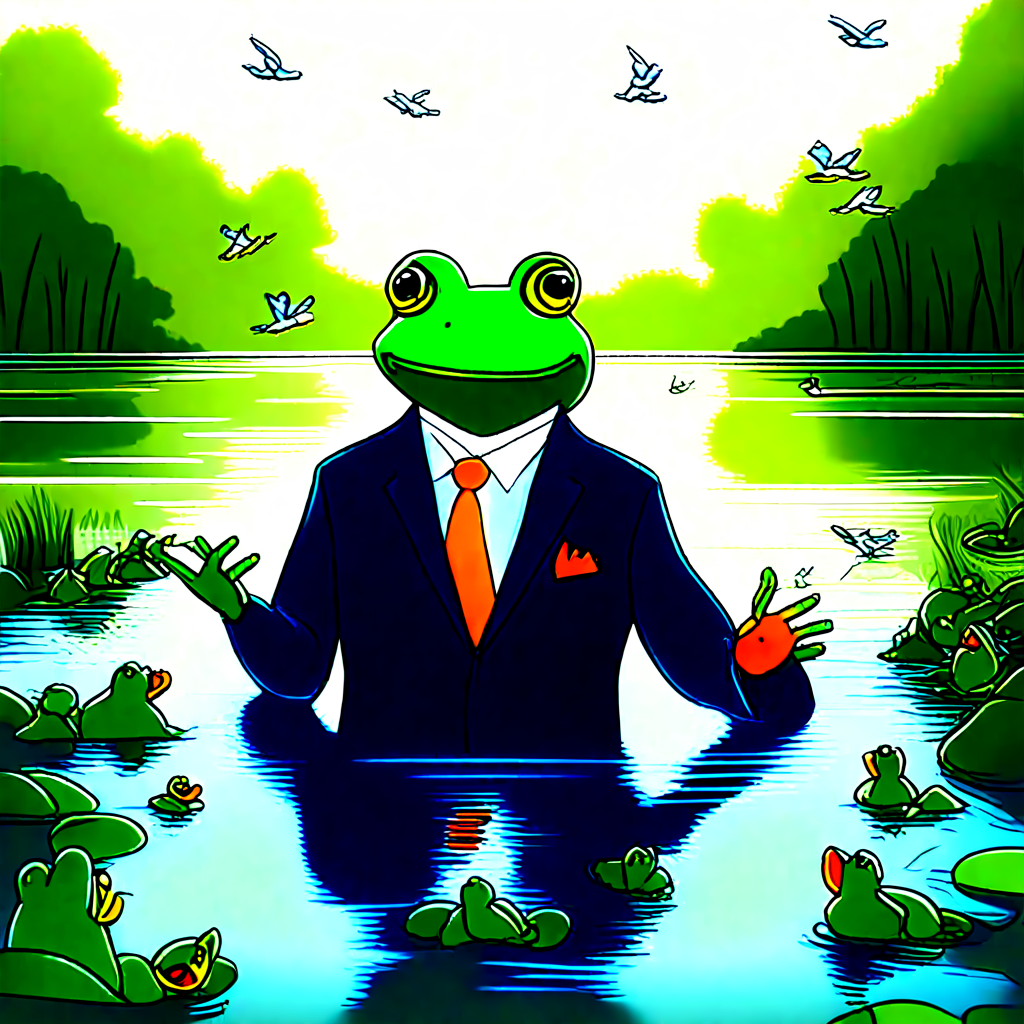

In [ ]:
pipe = load_pipe(
  solver           = 'EULER', 
  scheduler        = 'SNR',
  cacher_quantizer = 'DEEPCACHE'
  )


pipe(
  'A frog in a suit giving a motivational speech at a pond, to an audience of ducks', 
  guidance_scale=5,
  num_inference_steps = 80,
  generator = torch.Generator(device='cuda').manual_seed(42),
  return_dict=False,
  )[0][0]